In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk

In [266]:
base_casa = pd.read_csv('dataBases/house_prices.csv')
base_casa

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [267]:
base_casa.drop('date', axis=1, inplace=True)

In [268]:
base_casa.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [269]:
base_casa.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

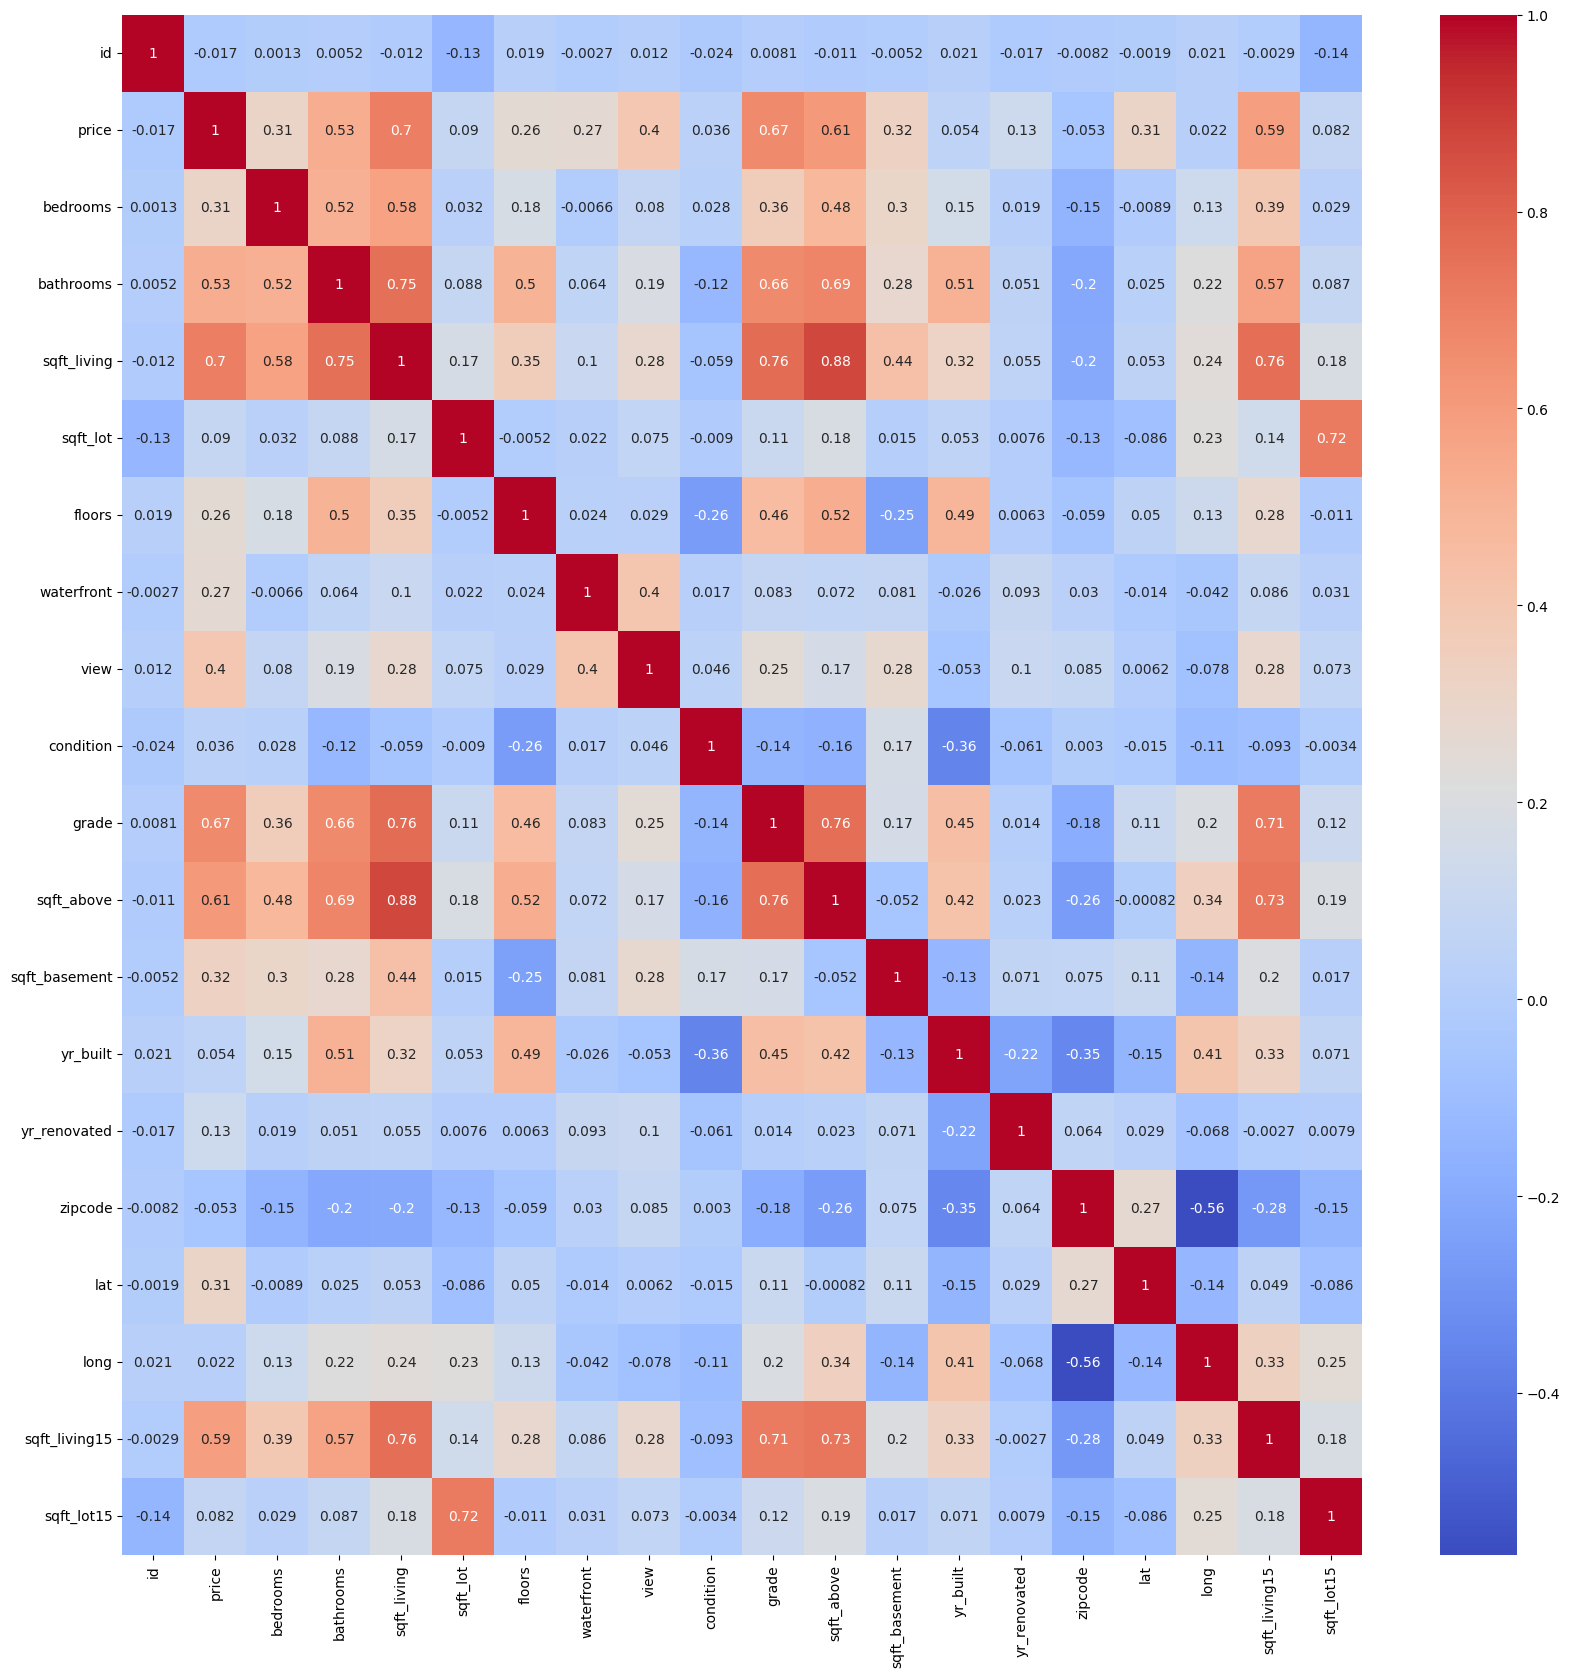

In [270]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casa.corr(), cmap='coolwarm', annot=True)

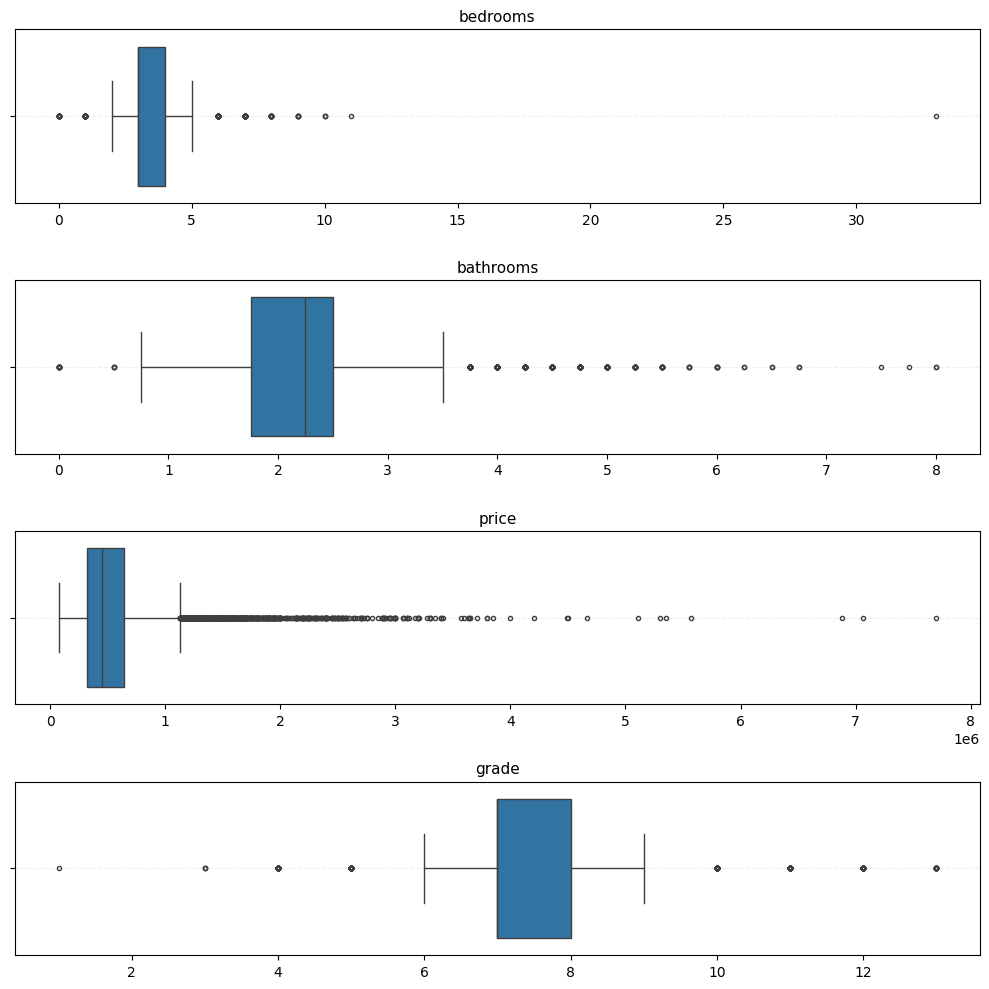

In [271]:
colunas = ['bedrooms', 'bathrooms', 'price', 'grade']

plt.figure(figsize=(10,10))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(len(colunas), 1, i)
    sns.boxplot(data = base_casa, x = coluna, fliersize=3, linewidth=1)
    plt.title(coluna, fontsize=11)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.2)

plt.tight_layout()


In [272]:
x_casas = base_casa.iloc[:, 2:18].values

In [273]:
y_casas = base_casa.iloc[:, 1].values

In [274]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size=0.3, random_state=0)

In [275]:
x_casas_treinamento.shape, x_casas_teste.shape

((15129, 16), (6484, 16))

In [276]:
from sklearn.linear_model import LinearRegression


regressor_mult_casas = LinearRegression()
regressor_mult_casas.fit(x_casas_treinamento, y_casas_treinamento)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [277]:
regressor_mult_casas.score(x_casas_treinamento, y_casas_treinamento)

0.7029888085955007

In [278]:
regressor_mult_casas.score(x_casas_teste, y_casas_teste)

0.6885414149062644

In [279]:
previsoes = regressor_mult_casas.predict(x_casas_teste)
previsoes

array([ 383751.77768702, 1514216.17517451,  546921.96179115, ...,
        314968.5762327 ,  219405.55573559,  148128.83467043],
      shape=(6484,))

In [280]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.],
      shape=(6484,))

In [281]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
poly =  PolynomialFeatures(degree = 3)

In [282]:
x_casas_treinamento_poly = poly.fit_transform(x_casas_treinamento) # dados de treinamento
X_casas_teste_poly = poly.transform(x_casas_teste) # treinar dados de teste

In [283]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(x_casas_treinamento_poly, y_casas_treinamento)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [284]:
regressor_casas_poly.score(X_casas_teste_poly, y_casas_teste)

0.7451833775035904

In [285]:
previsoes = regressor_casas_poly.predict(X_casas_teste_poly)
previsoes

array([ 434959.32466345, 2004245.37350399,  589643.56652408, ...,
        338508.03388045,  258767.09749328,  219960.99768435],
      shape=(6484,))

In [286]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.],
      shape=(6484,))

In [288]:
mean_absolute_error(y_casas_teste, previsoes)

105969.04554836603

In [289]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(x_casas_treinamento, y_casas_treinamento)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [295]:
regressor_arvore_casas.score(x_casas_treinamento, y_casas_treinamento)

0.9992712177726063

In [291]:
regressor_arvore_casas.score(x_casas_teste, y_casas_teste)

0.7531321901776585

In [292]:
previsoes = regressor_arvore_casas.predict(x_casas_teste)
previsoes

array([ 288000., 2340000.,  499000., ...,  289000.,  215000.,  219950.],
      shape=(6484,))

In [293]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.],
      shape=(6484,))

In [294]:
mean_absolute_error(y_casas_teste, previsoes)

99519.69532695867